In [1]:
#imported the required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [19]:
##Importing dataset with Limited columns
df=pd.read_csv('C:\\Users\\Avneshs\\Desktop\\EDA\\Handling Missing Data\\titanic.csv',usecols=['Age','Fare','Survived'])

In [20]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
#checking the null values for each field
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
##pulling the records having null in 'embarked' field
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [8]:
##Assigning 1 to Null values of field Cabin and 0 to all other values and exporting it to new Variable
df['Cabin_null']=np.where(df['Cabin'].isnull(),1,0)

In [10]:
df['Cabin_null']

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    1
889    0
890    1
Name: Cabin_null, Length: 891, dtype: int32

In [11]:
df['Cabin_null'].mean()

0.7710437710437711

In [15]:
#Grouping Survived on Cabin_null
df.groupby(['Survived'])['Cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

# Mean Median Mode Imputation

In [21]:
df.isnull()

,Survived,Age,Fare
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
886,False,False,False
887,False,False,False
888,False,True,False
889,False,False,False


In [22]:
##Checking the percentage of null values for all the selected fields
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [26]:
##Creating function to pass the median Value to Null values
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [30]:
##Calculating Median for the field Age
median=df.Age.median()
median

In [32]:
##calling the function
impute_nan(df,'Age',df.Age.median())


In [33]:
df.columns

Index(['Survived', 'Age', 'Fare', 'Age_median'], dtype='object')

In [35]:
df[df['Age'].isnull()]

,Survived,Age,Fare,Age_median
5,0,NaN,8.4583,28.0
17,1,NaN,13.0000,28.0
19,1,NaN,7.2250,28.0
26,0,NaN,7.2250,28.0
28,1,NaN,7.8792,28.0
...,...,...,...,...
859,0,NaN,7.2292,28.0
863,0,NaN,69.5500,28.0
868,0,NaN,9.5000,28.0
878,0,NaN,7.8958,28.0


In [39]:
##Printing the standard deviation of Age with Null and without Null(with median)
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334042
13.019696550973201


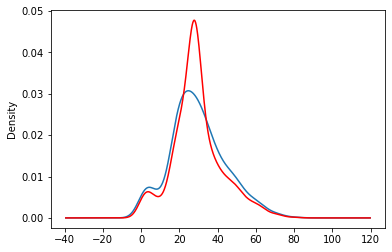

In [40]:
##Plotting the grpahs for Age and Age_median to compare the standard Deviation
fig = plt.figure() 
ax = fig.add_subplot(111) 
df['Age'].plot(kind='kde', ax=ax) 
df.Age_median.plot(kind='kde', ax=ax, color='red') 
lines, labels = ax.get_legend_handles_labels()

# Random Sample Imputation

In [6]:
df=pd.read_csv('C:\\Users\\Avneshs\\Desktop\EDA\\Handling Missing Data\\titanic.csv',usecols=['Age','Fare','Survived'])

In [7]:
df.head()


,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [44]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [9]:
##Creating Sample values from Age Actual values and Providing it to Null values
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [17]:
def Random_imputation(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_Sample"]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+"_Sample"]=random_sample

In [18]:
median=df.Age.median()

In [19]:
Random_imputation(df,"Age",median)

In [21]:
df.head(200)

,Survived,Age,Fare,Age_median,Age_Sample
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
195,1,58.0,146.5208,58.0,58.0
196,0,NaN,7.7500,28.0,15.0
197,0,42.0,8.4042,42.0,42.0
198,1,NaN,7.7500,28.0,22.0


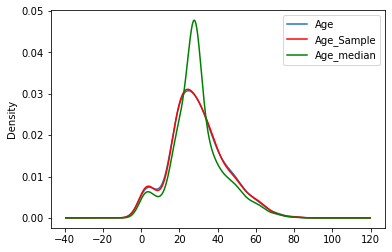

In [25]:
##Plotting the grpahs for Age and Age_median to compare the standard Deviation
fig = plt.figure() 
ax = fig.add_subplot(111) 
df['Age'].plot(kind='kde', ax=ax) 
df.Age_Sample.plot(kind='kde', ax=ax, color='red') 
df.Age_median.plot(kind='kde', ax=ax, color='Green') 
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# Capturing Missing Values with New Feature

In [26]:
df=pd.read_csv('C:\\Users\\Avneshs\\Desktop\EDA\\Handling Missing Data\\titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [27]:
import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [28]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [30]:
median=df.Age.median()

In [32]:
df['Age'].fillna(median,inplace=True)

In [33]:
df.head(100)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
95,0,28.0,8.0500,1
96,0,71.0,34.6542,0
97,1,23.0,63.3583,0
98,1,34.0,23.0000,0


# End of Distribution Imputation

In [34]:
df=pd.read_csv('C:\\Users\\Avneshs\\Desktop\EDA\\Handling Missing Data\\titanic.csv',usecols=['Age','Fare','Survived'])

In [35]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


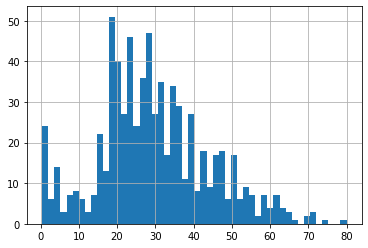

In [36]:
df.Age.hist(bins=50)

In [37]:
extreme=df.Age.mean()+3*df.Age.std()

C:\ProgramData\Anaconda3\envs\hj37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


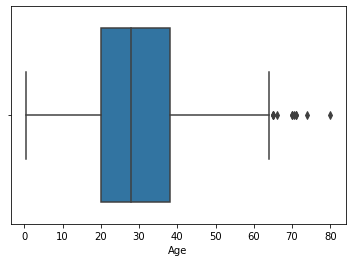

In [42]:
import seaborn as sns
sns.boxplot('Age',data=df)

In [43]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median)

In [44]:
median=df.Age.median()

In [45]:
impute_nan(df,"Age",median,extreme)

In [46]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


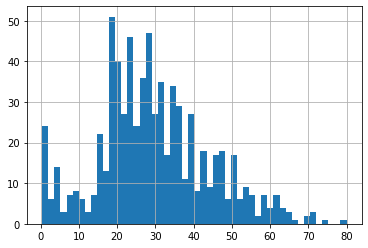

In [47]:
df['Age'].hist(bins=50)

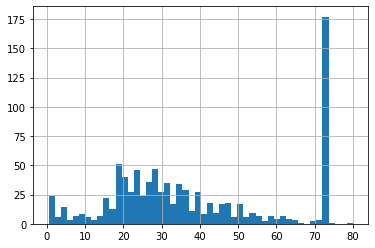

In [49]:
df['Age_end_distribution'].hist(bins=50)

C:\ProgramData\Anaconda3\envs\hj37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


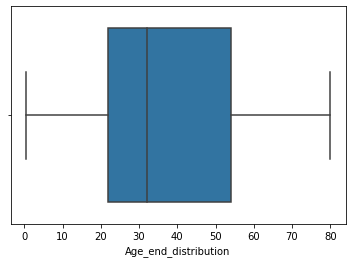

In [50]:
sns.boxplot('Age_end_distribution',data=df)

# Handle Categorical Missing Data

In [51]:
##Importing dataset with Limited columns
df=pd.read_csv('C:\\Users\\Avneshs\\Desktop\\EDA\\Handling Missing Data\\loan.csv')

FileNotFoundError: [Errno 2] File C:\Users\Avneshs\Desktop\EDA\Handling Missing Data\loan.csv does not exist: 'C:\\Users\\Avneshs\\Desktop\\EDA\\Handling Missing Data\\loan.csv'